In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sop
import scipy.ndimage as snd
import scipy.integrate as sint

In [139]:
def fn(x,n):
    return x**n/(1+x**n)

frpc = lambda x: (x>0)*fn(x,2)
frsst = lambda x: (x>0)*x**3
frvip = lambda x: (x>0)*x**3

In [76]:
def compute_nullcline(x,indx,indy,rdot,shp=(6,),init=None):
    # for r[indx] = x, find r[indy] s.t. rdot(r)[indx] = 0
    if init is None:
        r0 = np.zeros(shp)
        lb = np.zeros(shp)
        ub = np.ones(shp)*np.inf
    else:
        r0 = init
        lb = np.maximum(init-0.001,0)
        ub = init+0.001
    
    r0[indx] = x
    lb[indx] = x - 1e-8
    ub[indx] = x + 1e-8
    
    return sop.least_squares(rdot,r0,bounds=(lb,ub))

In [131]:
def compute_rdot(x,indx,indy,rdot,rg,shp=(6,),init=None,indz=None):
    if init is None:
        r0 = np.zeros(shp)
    else:
        r0 = init
    if indz is None:
        indz = indx
    
    r0[indx] = x

    vals = np.zeros_like(rg)
    for ir,r in enumerate(rg):
        r0[indy] = r
        vals[ir] = rdot(r0)[indz]
        
    return vals

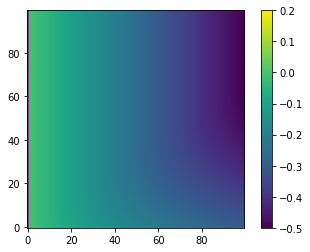

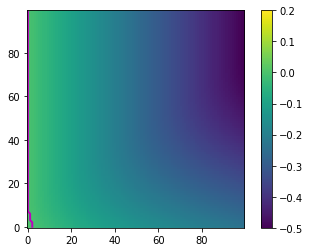

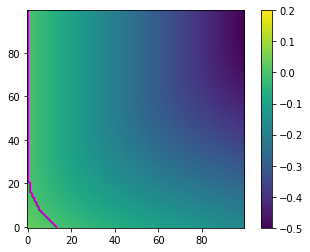

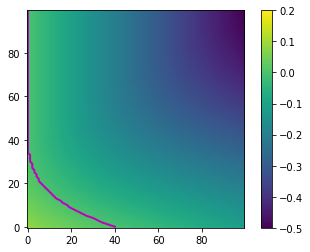

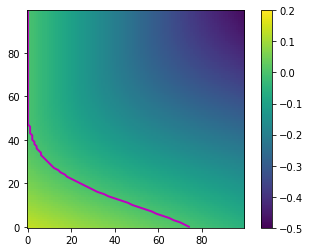

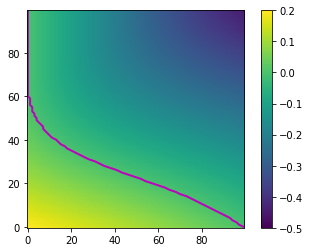

In [130]:
inp_horiz = 0
inp_vip = 0.5
hcoupling = 1

for inp in np.linspace(0,0.5,6):
    
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def rdot(r,inp):
        return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
    
    shp = (6,)
    soln = None
    
    rpcs = np.linspace(0,0.5,100)
    rssts = np.linspace(0,0.5,100)
    rdots = np.zeros(rpcs.shape+rssts.shape)

    indx = 0
    indy = 1
    for irpc,rpc in enumerate(rpcs):
        rdots[irpc] = compute_rdot(rpc,indx,indy,lambda r: rdot(r,inp),rssts)
    plt.figure()
    plt.imshow(rdots.T,origin='lower',vmin=-0.5,vmax=0.2)
    plt.colorbar()
    plt.plot(np.argmin(np.abs(rdots),axis=0),np.arange(100),c='m',linewidth=2)

In [116]:
mindist

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  2,  3,  3,  4,
        5,  5,  6,  7,  8, 10, 11, 13, 14, 16, 18, 20, 22, 25, 27, 30, 33,
       36, 39, 43, 46, 50, 54, 59, 63, 68, 73, 78, 84, 89, 95, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99,
       99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99, 99])

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in true_divide


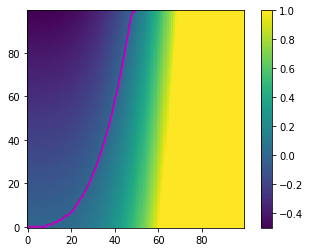

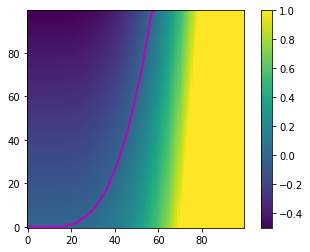

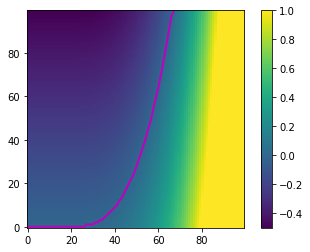

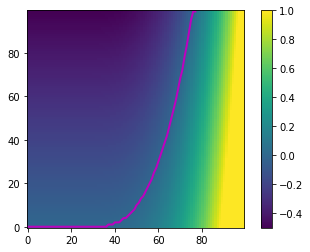

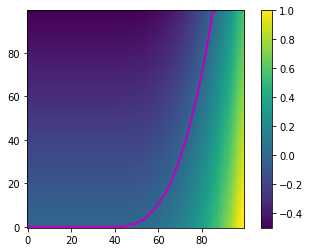

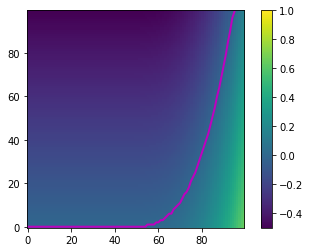

In [129]:
for rvip in np.linspace(0,0.5,6):
    inp_horiz = 0
    inp_vip = 0.5
    hcoupling = 1
    inp = 0.4
    
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def rdot(r,inp):
        return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
    
    shp = (6,)
    soln = None
    
    rpcs = np.linspace(0,0.5,100)
    rssts = np.linspace(0,0.5,100)
    rdots = np.zeros(rpcs.shape+rssts.shape)

    indx = 1
    indy = 0
    init = np.array((0,0,1,0,0,0))*rvip
    for irpc,rpc in enumerate(rpcs):
        rdots[irpc] = compute_rdot(rpc,indx,indy,lambda r: rdot(r,inp),rssts,init=init)
    plt.figure()
    plt.imshow(rdots,origin='lower',vmin=-0.5,vmax=1)
    plt.colorbar()
    minind = np.argmin(np.abs(rdots),axis=0)
    mindist = np.min(np.abs(rdots),axis=0)<0.05
    plt.plot(np.arange(100),minind*mindist/mindist,c='m',linewidth=2)

In [284]:
inp_horiz = 0
inp_vip = 0.5
hcoupling = 1

ninp = 5

rpcs = np.linspace(0,0.3,500)
rssts = np.linspace(0,0.3,500)
rvip = np.zeros((ninp,)+rpcs.shape+rssts.shape)
rdotpc = np.zeros_like(rvip)
rdotsst = np.zeros_like(rvip)
rdotsst_novip = np.zeros_like(rvip)

Wpp = 1
Wps = 1.5
Wsp = 3.3
Wpv = 0
Wvp = 0.7
scaling_both = 1
scaling_Wvs = 1
Wvs = 2.1*scaling_both*scaling_Wvs
Wsv = 1.3*scaling_both

W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))

for iinp,inp in enumerate(np.linspace(0,0.4,ninp)):
    
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def frfunction(r,inp):
        return frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
    def rdot(r,inp):
        return -r + frfunction(r,inp)
    
    for irpc,rpc in enumerate(rpcs):
        for irsst,rsst in enumerate(rssts):
            r = np.array((rpc,rsst,0,0,0,0))
            to_start = frfunction(r,inp)
            rvip[iinp,irpc,irsst] = to_start[2]
            rdotsst_novip[iinp,irpc,irsst] = -rsst + to_start[1]
            rdotpc[iinp,irpc,irsst] = -rpc + to_start[0]
            r = np.array((rpc,rsst,rvip[iinp,irpc,irsst],0,0,0))
            rdotsst[iinp,irpc,irsst] = -rsst + frfunction(r,inp)[1]


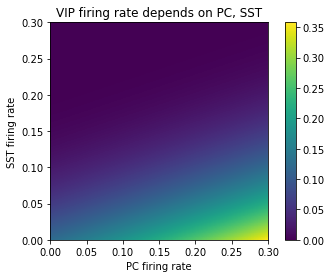

In [268]:
plt.figure()
plt.imshow(rvip[0].T,origin='lower',extent=[0,0.3,0,0.3])
plt.xlabel('PC firing rate')
plt.ylabel('SST firing rate')
plt.colorbar()
plt.title('VIP firing rate depends on PC, SST')
plt.savefig('vip_function_of_pc_sst.pdf')
plt.savefig('vip_function_of_pc_sst.png')

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


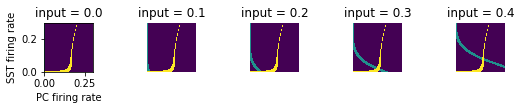

In [286]:
thresh = 7.5e-3
plt.figure(figsize=(7.5,1.5))
for i in range(ninp):
    plt.subplot(1,ninp,i+1)
    color = 1*(np.abs(rdotsst[i]).T<thresh) + 1*np.logical_or(np.abs(rdotsst[i]).T<thresh,np.abs(rdotpc[i]).T<thresh)
    plt.imshow(color,origin='lower',extent=[0,0.3,0,0.3],vmax=2,interpolation='nearest')
    plt.axis('off')
    plt.title('input = %.1f' % (0.1*i))
plt.subplot(1,ninp,1)
plt.axis('on')
plt.xlabel('PC firing rate')
plt.ylabel('SST firing rate')
plt.tight_layout()
plt.savefig('pc_sst_nullclines_small.pdf')
plt.savefig('pc_sst_nullclines_small.png')
    
# thresh = 10e-3
# plt.figure(figsize=(10,2))
# for i in range(ninp):
#     plt.subplot(1,ninp,i+1)
#     color = np.logical_or(np.abs(rdotsst[i]).T<thresh,np.abs(rdotpc[i]).T<thresh)
#     plt.imshow(color,origin='lower')
#     plt.axis('off')

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


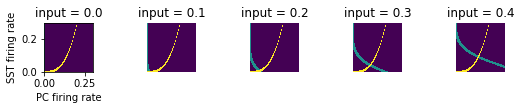

In [288]:
thresh = 7.5e-3
plt.figure(figsize=(7.5,1.5))
for i in range(ninp):
    plt.subplot(1,ninp,i+1)
    color = 1*(np.abs(rdotsst_novip[i]).T<thresh) + 1*np.logical_or(np.abs(rdotsst_novip[i]).T<thresh,np.abs(rdotpc[i]).T<thresh)
    plt.imshow(color,origin='lower',extent=[0,0.3,0,0.3],vmax=2,interpolation='nearest')
    plt.axis('off')
    plt.title('input = %.1f' % (0.1*i))
plt.subplot(1,ninp,1)
plt.axis('on')
plt.xlabel('PC firing rate')
plt.ylabel('SST firing rate')
plt.tight_layout()
plt.savefig('pc_sst_novip_nullclines_small.pdf')
plt.savefig('pc_sst_novip_nullclines_small.png')

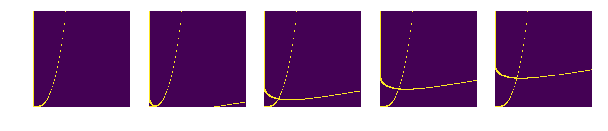

In [235]:
thresh = 2.5e-3
plt.figure(figsize=(10,2))
for i in range(ninp):
    plt.subplot(1,ninp,i+1)
    color = np.logical_or(np.abs(rdotsst_novip[i]).T<thresh,np.abs(rdotpc[i]).T<thresh)
    plt.imshow(color,origin='lower')
    plt.axis('off')

In [310]:
inp_horiz = 1
inp_vip = 0.5
hcoupling = 1

ninp = 5

rpcs = np.linspace(0,1,500)
rssts = np.linspace(0,1,500)
rvip = np.zeros((ninp,)+rpcs.shape+rssts.shape)
rdotpc = np.zeros_like(rvip)
rdotsst = np.zeros_like(rvip)
rdotsst_novip = np.zeros_like(rvip)

Wpp = 1
Wps = 1.5
Wsp = 3.3
Wpv = 0
Wvp = 0.7
scaling_both = 1
scaling_Wvs = 1
Wvs = 2.1*scaling_both*scaling_Wvs
Wsv = 1.3*scaling_both

W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))

for iinp,inp in enumerate(np.linspace(0,0.4,ninp)):
    
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def frfunction(r,inp):
        return frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
    def rdot(r,inp):
        return -r + frfunction(r,inp)
    
    for irpc,rpc in enumerate(rpcs):
        for irsst,rsst in enumerate(rssts):
            r = np.array((rpc,rsst,0,rpc,rsst,0))
            to_start = frfunction(r,inp)
            rvip[iinp,irpc,irsst] = to_start[2]
            rdotsst_novip[iinp,irpc,irsst] = -rsst + to_start[1]
            rdotpc[iinp,irpc,irsst] = -rpc + to_start[0]
            r = np.array((rpc,rsst,rvip[iinp,irpc,irsst],rpc,rsst,rvip[iinp,irpc,irsst]))
            rdotsst[iinp,irpc,irsst] = -rsst + frfunction(r,inp)[1]

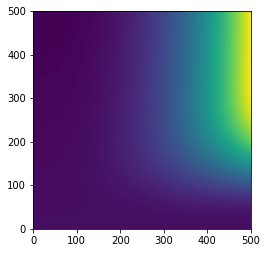

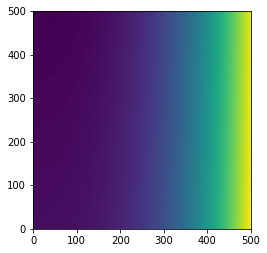

In [271]:
plt.figure()
plt.imshow(rdotsst[0].T,origin='lower')
plt.figure()
plt.imshow(rdotsst_novip[0].T,origin='lower')

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


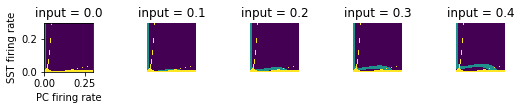

In [299]:
thresh = 50e-3
plt.figure(figsize=(7.5,1.5))
for i in range(ninp):
    plt.subplot(1,ninp,i+1)
    color = 1*(np.abs(rdotsst[i]).T<thresh) + 1*np.logical_or(np.abs(rdotsst[i]).T<thresh,np.abs(rdotpc[i]).T<thresh)
    plt.imshow(color,origin='lower',extent=[0,0.3,0,0.3],vmax=2,interpolation='nearest')
    plt.axis('off')
    plt.title('input = %.1f' % (0.1*i))
plt.subplot(1,ninp,1)
plt.axis('on')
plt.xlabel('PC firing rate')
plt.ylabel('SST firing rate')
plt.tight_layout()
# plt.savefig('pc_sst_nullclines_big.pdf')
# plt.savefig('pc_sst_nullclines_big.png')
    
# thresh = 10e-3
# plt.figure(figsize=(10,2))
# for i in range(ninp):
#     plt.subplot(1,ninp,i+1)
#     color = np.logical_or(np.abs(rdotsst[i]).T<thresh,np.abs(rdotpc[i]).T<thresh)
#     plt.imshow(color,origin='lower')
#     plt.axis('off')

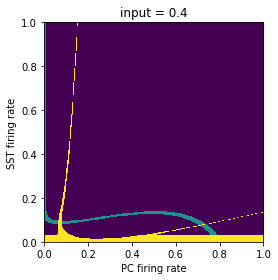

In [313]:
thresh = 10e-3
plt.figure()#figsize=(7.5,1.5))
for i in range(4,5):
#     plt.subplot(1,ninp,i+1)
    color = 1*(np.abs(rdotsst[i]).T<3*thresh) + 1*np.logical_or(np.abs(rdotsst[i]).T<3*thresh,np.abs(rdotpc[i]).T<thresh)
    plt.imshow(color,origin='lower',extent=[0,1,0,1],vmax=2,interpolation='nearest')
    plt.axis('off')
    plt.title('input = %.1f' % (0.1*i))
# plt.subplot(1,ninp,1)
plt.axis('on')
plt.xlabel('PC firing rate')
plt.ylabel('SST firing rate')
plt.tight_layout()
plt.savefig('pc_sst_nullclines_big_zoomout.pdf')
plt.savefig('pc_sst_nullclines_big_zoomout.png')

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


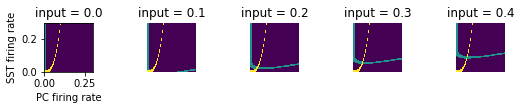

In [291]:
thresh = 10e-3
plt.figure(figsize=(7.5,1.5))
for i in range(ninp):
    plt.subplot(1,ninp,i+1)
    color = 1*(np.abs(rdotsst_novip[i]).T<thresh) + 1*np.logical_or(np.abs(rdotsst_novip[i]).T<thresh,np.abs(rdotpc[i]).T<thresh)
    plt.imshow(color,origin='lower',extent=[0,0.3,0,0.3],vmax=2,interpolation='nearest')
    plt.axis('off')
    plt.title('input = %.1f' % (0.1*i))
plt.subplot(1,ninp,1)
plt.axis('on')
plt.xlabel('PC firing rate')
plt.ylabel('SST firing rate')
plt.tight_layout()
plt.savefig('pc_sst_novip_nullclines_big.pdf')
plt.savefig('pc_sst_novip_nullclines_big.png')

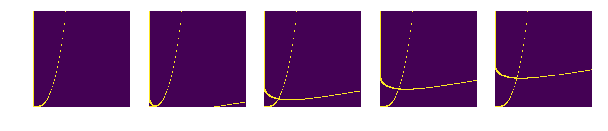

In [233]:
thresh = 2.5e-3
plt.figure(figsize=(10,2))
for i in range(ninp):
    plt.subplot(1,ninp,i+1)
    color = np.logical_or(np.abs(rdotsst_novip[i]).T<thresh,np.abs(rdotpc[i]).T<thresh)
    plt.imshow(color,origin='lower')
    plt.axis('off')

/home/mossing/anaconda3/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


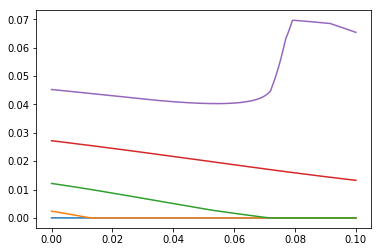

In [80]:
plt.figure()
for inp in np.linspace(0,0.4,5):
    inp_horiz = 0
    inp_vip = 0.5
    hcoupling = 1
    
    W_big = np.concatenate((np.concatenate((W,hcoupling*W),axis=1),np.concatenate((hcoupling*W,W),axis=1)),axis=0)

    def frtotal(x):
        rpc = frpc(x[0])[np.newaxis]
        rsst = frsst(x[1])[np.newaxis]
        rvip = frvip(x[2])[np.newaxis]
        return np.concatenate((rpc,rsst,rvip),axis=0)
    def frtotal_big(x):
        return np.concatenate((frtotal(x[:3]),frtotal(x[3:])),axis=0)
    def rdot(r,inp):
        return -r + frtotal_big(W_big.dot(r) + inp_horiz*inp*np.array((0,0,0,1,0,0)) + inp*np.array((1,0,0,0,0,0)) + inp_vip*np.array((0,0,1,0,0,1)))
    
    shp = (6,)
    soln = None
    
    rpcs = np.linspace(0,0.1,500)
    rinf_sst = np.zeros_like(rpcs)
    rinf_sst = rinf_sst/0

    indx = 0
    indy = 1
    for irpc,rpc in enumerate(rpcs):
        soln = compute_nullcline(rpc,0,1,lambda r: rdot(r,inp),shp=shp,init=soln)
        rinf_sst[irpc] = soln['x'][indy]
        if not soln['success']:
            break
        soln = soln['x']
    plt.plot(rpcs,rinf_sst)

In [78]:
soln = compute_nullcline(rpc,0,1,lambda r: rdot(r,inp),shp=shp,init=soln)

In [79]:
soln

 active_mask: array([-1,  0,  1,  0,  0,  1])
        cost: 0.018189622708881133
         fun: array([-0.09293184,  0.04336257, -0.01286516,  0.15378969,  0.04336257,
       -0.01286516])
        grad: array([ 2.46709093e-01,  6.12852177e-07, -5.45093166e-02, -1.24383845e-05,
        6.12852177e-07, -5.45093166e-02])
         jac: array([[-0.41739967, -0.87390051, -0.        ,  0.58260033, -0.87390051,
        -0.        ],
       [ 1.64338656, -1.        , -0.7768736 ,  1.64338656,  0.        ,
        -0.7768736 ],
       [ 1.11494692, -4.01380868, -1.        ,  1.11494692, -4.01380868,
        -0.        ],
       [ 0.61177296, -0.91765943, -0.        , -0.38822704, -0.91765943,
        -0.        ],
       [ 1.64338656,  0.        , -0.7768736 ,  1.64338656, -1.        ,
        -0.7768736 ],
       [ 1.11494692, -4.01380868, -0.        ,  1.11494692, -4.01380868,
        -1.        ]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 4
        njev: 4
  opt

(0, 1)

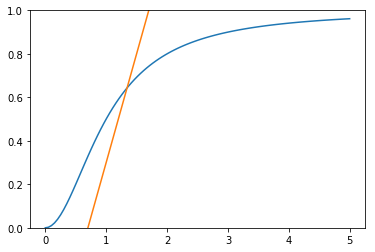

In [73]:
Wpp = 1
Wps = 1.5
Wsp = 3.3
Wpv = 0
Wvp = 0.7
scaling_both = 1.2
scaling_Wvs = 1
Wvs = 2.1*scaling_both*scaling_Wvs
Wsv = 1.3*scaling_both

inp = 0.2

u = np.linspace(0,5,100)
rsst = 0.6
plt.figure()
plt.plot(u,frpc(u))
plt.plot(u,u/Wpp + (inp - Wps*rsst)/Wpp)
plt.ylim(0,1)

In [70]:
8/(3*np.sqrt(3))

1.539600717839002

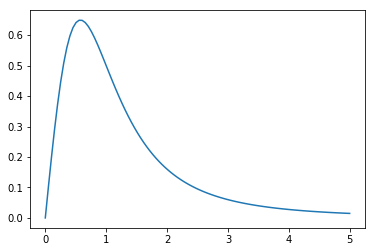

In [69]:
plt.figure()
plt.plot(u,2*u/(1+u**2)**2)

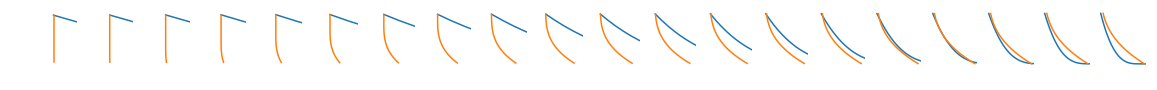

In [60]:
Wpp = 1
Wps = 1.5
Wsp = 3.3
Wpv = 0
Wvp = 0.7
scaling_both = 1.2
scaling_Wvs = 1
Wvs = 2.1*scaling_both*scaling_Wvs
Wsv = 1.3*scaling_both
W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
plt.figure(figsize=(20,1))
plot_sst_vip_nullclines(W)

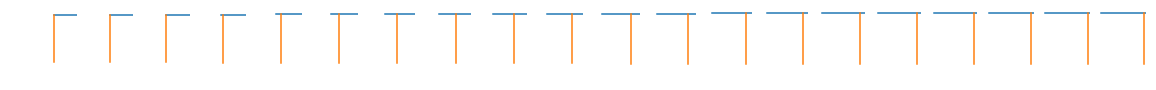

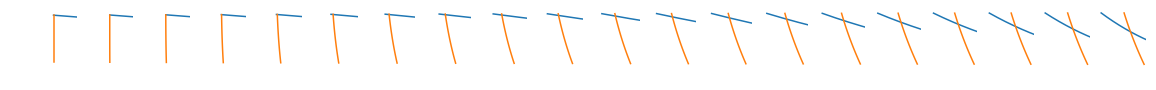

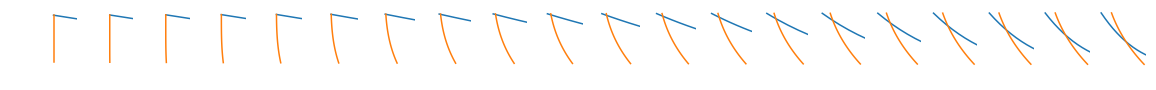

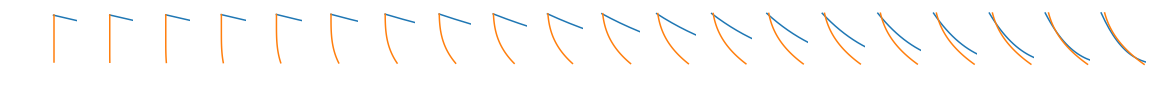

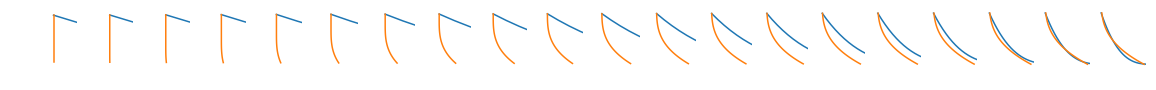

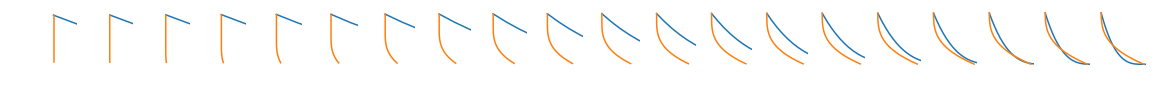

In [5]:
#     Wpp = 1
#     Wps = 1.5
#     Wsp = 3.3
#     Wpv = 0
#     Wvp = 0.7
#     Wvs = 2.1
#     Wsv = 1.3

Wpp = 1
Wps = 2
Wsp = 3
Wpv = 0
Wvp = 1
for w in range(6):
    alpha = 0.67
    Wvs = w*alpha
    Wsv = w*(1-alpha)

    W = np.array(((Wpp,-Wps,-Wpv),(Wsp,0,-Wsv),(Wvp,-Wvs,0)))
    plt.figure(figsize=(20,1))
    plot_sst_vip_nullclines(W)

NameError: name 'r0' is not defined

AttributeError: 'NoneType' object has no attribute 'shape'

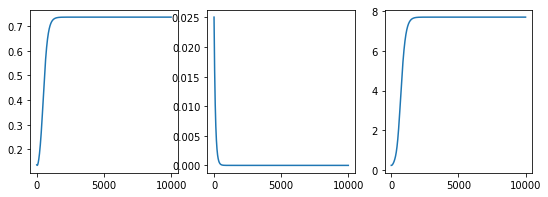